1. Gerekli kütüphaneler

In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter

2. Veriyi okuma

In [2]:
# Eğitim ve test verilerini oku
train_df = pd.read_csv("../datasets/normal/train_mental.csv")
test_df = pd.read_csv("../datasets/normal/test_mental.csv")

# Özellik ve hedef ayır (✅ doğru hedef sütunu kullanılıyor)
X_train = train_df.drop("support_needed", axis=1)
y_train = train_df["support_needed"]

X_test = test_df.drop("support_needed", axis=1)
y_test = test_df["support_needed"]

print("✅ Eğitim verisi:", X_train.shape)
print("✅ Test verisi:", X_test.shape)
print("🎯 Sınıf dağılımı (y_train):\n", y_train.value_counts())

✅ Eğitim verisi: (1007, 23)
✅ Test verisi: (252, 23)
🎯 Sınıf dağılımı (y_train):
 support_needed
0    528
1    479
Name: count, dtype: int64


In [3]:
# SMOTE uygulama
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

print("🎯 Yeni sınıf dağılımı:", Counter(y_train_balanced))

# Verileri ölçekle (Logistic Regression için önemli)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

🎯 Yeni sınıf dağılımı: Counter({0: 528, 1: 528})


3. Lojistik Regresyon modeli

In [4]:
# Modeli oluştur
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train_balanced)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

4. Tahmin

In [5]:
# Tahminler
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

5. Değerlendirme

📋 Sınıflandırma Raporu (Logistic Regression):

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       132
           1       0.79      0.82      0.80       120

    accuracy                           0.81       252
   macro avg       0.81      0.81      0.81       252
weighted avg       0.81      0.81      0.81       252



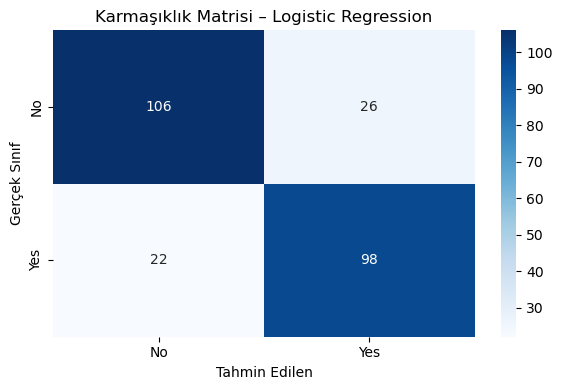

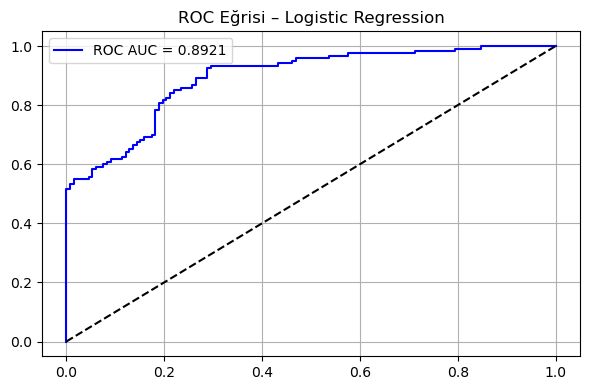

In [6]:
# Rapor
print("📋 Sınıflandırma Raporu (Logistic Regression):\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Karmaşıklık Matrisi – Logistic Regression")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Sınıf")
plt.tight_layout()
plt.show()

# ROC Eğrisi
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}", color="blue")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Eğrisi – Logistic Regression")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()